In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
from numpy import partition
import matplotlib
from tabulate import tabulate
from pandas import DataFrame, Series
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import fix_yahoo_finance as yf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# New library
import pandas_datareader.data as web
import xlrd
import datetime
# import libraries
from decimal import Decimal
from matplotlib import pyplot as plt
from pandas.io.json import json_normalize
import plotly
import math
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
!pip freeze > requirements.txt # to download all packages from your computer environment

In [10]:
# Bitcoin DataFrame

btc = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
btc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,4007.709961,3628.429932,3646.090088,3947.860107,353705007,3947.860107
2018-12-29,4004.139893,3774.379883,3947.860107,3797.060059,214891355,3797.060059
2018-12-30,3925.179932,3760.800049,3797.060059,3896.209961,191958416,3896.209961
2018-12-31,3904.280029,3701.479980,3896.209961,3747.389893,206190463,3747.389893
2019-01-01,3938.750000,3696.939941,3747.389893,3880.149902,170598307,3880.149902


In [11]:
cci30 = pd.read_excel ("CCI30_Avg.xlsx")
#cci30= pd.read_csv('cci30_OHLCV.csv').drop()
cci30.to_csv('CCI30_Avg.csv')
cci30.shape

(520, 6)

In [12]:
cci30.tail()

,Date,Open,High,Low,Close,Volume
515,2017-08-04,2857.488535,2973.609267,2786.287149,2895.141808,NaN
516,2017-08-03,2747.610167,2904.794458,2708.045957,2854.083704,NaN
517,2017-08-02,2728.731759,2848.555202,2640.016382,2744.081103,NaN
518,2017-08-01,2599.103422,2816.712041,2497.181853,2727.450542,NaN
519,2017-07-31,2556.769252,2659.877081,2486.392999,2618.434304,NaN


In [13]:
cci30= pd.read_csv('CCI30_Avg.csv', index_col=1, parse_dates=True).drop(['Unnamed: 0'],axis=1)
cci30.shape
cci30 = cci30.sort_values('Date')

In [14]:
btc.to_csv('Bitcoin.csv')
btc.shape

(519, 6)

In [15]:
# ltc DataFrame

ltc = web.get_data_yahoo('LTC-USD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
ltc.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,34.020000,28.049999,28.049999,32.660000,22119392,32.660000
2018-12-29,33.660000,30.860001,32.660000,31.049999,15766864,31.049999
2018-12-30,32.419998,30.510000,31.049999,32.020000,10115468,32.020000
2018-12-31,32.209999,29.780001,32.020000,30.129999,11560339,30.129999
2019-01-01,32.419998,29.629999,30.129999,32.119999,9487755,32.119999


In [25]:
# ETH-USD DataFrame

eth = web.get_data_yahoo('ETH-USD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
eth.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-31,232.550003,201.270004,201.330002,225.899994,314260050,225.899994
2017-08-01,228.979996,215.710007,225.899994,218.119995,122967812,218.119995
2017-08-02,228.080002,217.839996,218.119995,224.389999,93201219,224.389999
2017-08-03,227.449997,219.729996,224.389999,220.600006,87804496,220.600006
2017-08-04,258.470001,219.720001,220.600006,253.089996,251531536,253.089996


In [26]:
eth.to_csv('Ethereum.csv')

In [27]:
# bch-USD DataFrame

bch = web.get_data_yahoo('BCH-USD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
bch.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-31,488.799988,218.389999,421.000000,439.269989,1364069,439.269989
2017-08-01,974.710022,362.019989,439.269989,551.590027,44939867,551.590027
2017-08-02,635.729980,381.079987,551.590027,405.920013,39430900,405.920013
2017-08-03,414.380005,252.570007,405.920013,253.130005,39012988,253.130005
2017-08-04,294.839996,206.639999,253.130005,220.300003,26697590,220.300003


In [28]:
bch_close= pd.DataFrame(bch.Close)
bch_close.head()

,Close
Date,
2017-07-31,439.269989
2017-08-01,551.590027
2017-08-02,405.920013
2017-08-03,253.130005
2017-08-04,220.300003


In [29]:
btc_close= pd.DataFrame(btc.Close)
btc_close.head()

,Close
Date,
2017-07-31,2746.989990
2017-08-01,2720.530029
2017-08-02,2809.989990
2017-08-03,2878.489990
2017-08-04,3262.800049


In [30]:
ltc_close= pd.DataFrame(ltc.Close)
ltc_close.head()

,Close
Date,
2017-07-31,43.160000
2017-08-01,41.919998
2017-08-02,42.750000
2017-08-03,43.310001
2017-08-04,46.240002


In [31]:
eth_close= pd.DataFrame(eth.Close)
eth_close.head()

,Close
Date,
2017-07-31,225.899994
2017-08-01,218.119995
2017-08-02,224.389999
2017-08-03,220.600006
2017-08-04,253.089996


In [32]:
def photo_1():

    df = pd.read_csv('CCI30_Avg.csv')

    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    return fig
photo_1()


In [33]:
cci30_close= pd.DataFrame(cci30.Close)
cci30_close.head()

,Close
Date,
2017-07-31,2618.434304
2017-08-01,2727.450542
2017-08-02,2744.081103
2017-08-03,2854.083704
2017-08-04,2895.141808


In [34]:
cci30_close.shape

(520, 1)

In [35]:
# the  Percentage of change :
return_A = cci30_close['Close'].pct_change()[1:]
return_B = bch_close['Close'].pct_change()[1:]
return_c = btc_close['Close'].pct_change()[1:]
return_D = ltc_close['Close'].pct_change()[1:]
return_E = eth_close['Close'].pct_change()[1:]


# 4.1.1 Normal Portfolio (four crypto currencies only):Min_variance_port

In [36]:
# Data frame for returns
returns = pd.DataFrame()
returns["eth_close_A"] = return_E
returns["ltc_close_A"] = return_D
returns["btc_close_A"] = return_c
returns["bch_close_A"] = return_B
returns["cci30_close_A"] = return_A
returns = returns.dropna()
# cleaning data becuase there is differnce between number of days in stock market and BTC

print(returns.head())

            eth_close_A  ltc_close_A  btc_close_A  bch_close_A  cci30_close_A
Date                                                                         
2017-08-01    -0.034440    -0.028730    -0.009632     0.255697       0.041634
2017-08-02     0.028746     0.019800     0.032883    -0.264091       0.006097
2017-08-03    -0.016890     0.013099     0.024377    -0.376404       0.040087
2017-08-04     0.147280     0.067652     0.133511    -0.129696       0.014386
2017-08-05     0.045320    -0.014706    -0.009431     0.097912       0.097893


In [37]:
# we face a ****** problem of high correlation *****
# we need to start use market index for correction of that problem 

import statsmodels.api as sm

# Return values of S&P 500
X = returns.cci30_close_A.values
# Return values of stocks
Y = returns.btc_close_A.values
Z = returns.eth_close_A.values
N = returns.ltc_close_A.values
A = returns.bch_close_A.values

# Calculating Alpha and Beta of individual stocks using OLS regression

def linreg(x,y):

    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()

    x = x[:, 1]
    return results.params

Beta_BTC = linreg(X,Y)[1]
Beta_ETH = linreg(X,Z)[1]
Beta_LTC = linreg(X,N)[1]
Beta_BCH = linreg(X,A)[1]

Alpha_BTC = linreg(X,Y)[0]
Alpha_ETH = linreg(X,Z)[0]
Alpha_LTC = linreg(X,N)[0]
Alpha_BCH = linreg(X,A)[0]

print("Beta_BTC="+str(Beta_BTC))
print("Beta_ETH="+str(Beta_ETH))
print("Beta_LTC="+str(Beta_LTC))
print("Beta_BCH="+str(Beta_BCH))

print("Alpha_BTC:"+str(Alpha_BTC))
print("Alpha_ETH:"+str(Alpha_ETH))
print("Alpha_LTC:"+str(Alpha_LTC))
print("Alpha_BCH:"+str(Alpha_BCH))

Beta_BTC=0.41618146236703724
Beta_ETH=0.44908430282288814
Beta_LTC=0.5251690966020862
Beta_BCH=0.5626827546463897
Alpha_BTC:0.0013690128661651016
Alpha_ETH:0.0003149003012159644
Alpha_LTC:0.0011215639439476905
Alpha_BCH:0.0019152595999893745


In [38]:
# CAPM r(equity) = r(f) + B(equity)(r(m) - r(f))
return_market = return_A.mean() * 519  
print ("return_market :"+str(return_market))
risk_free= 0.0230  # source of TB <https://www.bloomberg.com/markets/rates-bonds/government-bonds/us>

#Function to calculate return on equity 
def retequ(Beta, risk_free):
    return_equity = risk_free + Beta*(return_market - risk_free)
    return return_equity


#Array of return of individual crypto
ret_of_crypto = [retequ(Beta_BTC, Alpha_BTC), retequ(Beta_ETH, Alpha_ETH), retequ(Beta_LTC, Alpha_LTC), retequ(Beta_BCH, Alpha_BCH) ]
print(ret_of_crypto)

return_market :0.599608789142334
[0.25034531780291025, 0.26944837855744685, 0.31542855932927355, 0.3382271012371991]


In [39]:
#Portfolio calculations for just one combination of weights
#Randomized weight distribution
weights = np.random.random(4) # we choose 4 becuase its random 4 values we have four crypto
weights /= np.sum(weights)
print(weights)


[0.47735949 0.26875192 0.02361172 0.23027687]


In [40]:
labels = ['BTC','ETH','LTC','BCH']
values = [0.08155621, 0.27740887, 0.37003299, 0.27100193]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [41]:
#Correlation between crypto
print(returns.corr())
returns = returns[returns.columns.drop('cci30_close_A')]


               eth_close_A  ltc_close_A  btc_close_A  bch_close_A  \
eth_close_A       1.000000     0.776157     0.686739     0.522882   
ltc_close_A       0.776157     1.000000     0.648870     0.435132   
btc_close_A       0.686739     0.648870     1.000000     0.399044   
bch_close_A       0.522882     0.435132     0.399044     1.000000   
cci30_close_A     0.407503     0.398868     0.457536     0.304844   

               cci30_close_A  
eth_close_A         0.407503  
ltc_close_A         0.398868  
btc_close_A         0.457536  
bch_close_A         0.304844  
cci30_close_A       1.000000  


In [42]:
#Return of portfolio
print(np.sum(ret_of_crypto * weights))

0.27725317148663303


In [43]:
#Volatility of portfolio
print(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))

1.3468325345765018


In [27]:
#Monte Carlo simulation to get info for 50,000 different weights of the four selected crypto
prets = []
pvols = []
crypto_weights = []
sharpe_ratio = []
for p in range (50000):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    prets.append(np.sum(ret_of_crypto * weights))
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))
    sharpe = np.sum(ret_of_crypto * weights) / np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights)))
    sharpe_ratio.append(sharpe)
    crypto_weights.append(weights)

In [28]:
import select

In [29]:
#Making a dictionary of Monte Carlo results
portfolio = {'Returns': prets,
             'Volatility': pvols,
             'Sharpe Ratio': sharpe_ratio}
selected= []
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in crypto_weights]
    
#Make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

#Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [crypto+' Weight' for crypto in selected]

#Reorder dataframe columns
df = df[column_order]
print(df.head())

    Returns  Volatility  Sharpe Ratio
0  0.277548    1.303467      0.212931
1  0.292481    1.213975      0.240928
2  0.305585    1.446140      0.211311
3  0.294294    1.302760      0.225901
4  0.299595    1.195458      0.250611


Text(0.5, 1.0, 'Efficient Frontier')

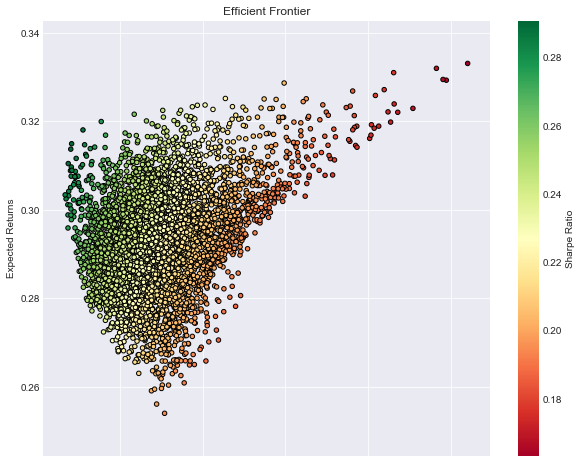

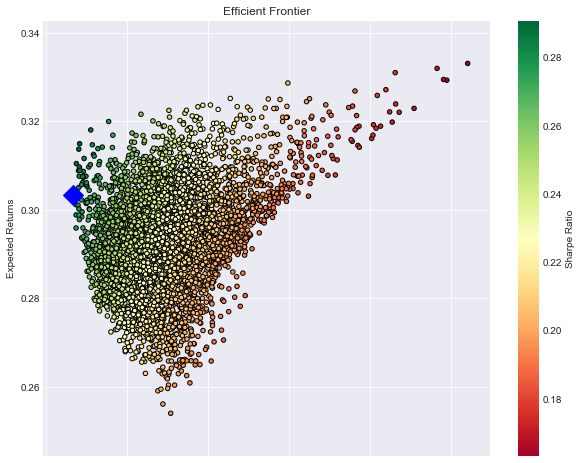

In [30]:
#Plot frontier with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

#Find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

#Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]

min_variance_port_info = df['Volatility'] == min_volatility

#Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [31]:
#Print the details of the 2 special portfolios
print(min_variance_port.T)

                  3709
Returns       0.303400
Volatility    1.067588
Sharpe Ratio  0.284192


# 4.2.1 Beta Hedging Portfolio (four crypto currencies only but with hedging the individual crypto beta): Min_variance_Hedge_port.


In [91]:
# the old data collected Data frame for returns
returns = pd.DataFrame()
returns["eth_close_A"] = return_E
returns["ltc_close_A"] = return_D
returns["btc_close_A"] = return_c
returns["bch_close_A"] = return_B
returns["cci30_close_A"] = return_A
returns = returns.dropna()
print(returns.head())

            eth_close_A  ltc_close_A  btc_close_A  bch_close_A  cci30_close_A
Date                                                                         
2017-08-01    -0.034440    -0.028730    -0.009632     0.255697       0.041634
2017-08-02     0.028746     0.019800     0.032883    -0.264091       0.006097
2017-08-03    -0.016890     0.013099     0.024377    -0.376404       0.040087
2017-08-04     0.147280     0.067652     0.133511    -0.129696       0.014386
2017-08-05     0.045320    -0.014706    -0.009431     0.097912       0.097893


old beta
Date
2017-08-01   -0.026960
2017-08-02    0.030346
2017-08-03    0.007694
2017-08-04    0.127524
2017-08-05   -0.050172
Name: btc_close_A + Beta Hedge, dtype: float64


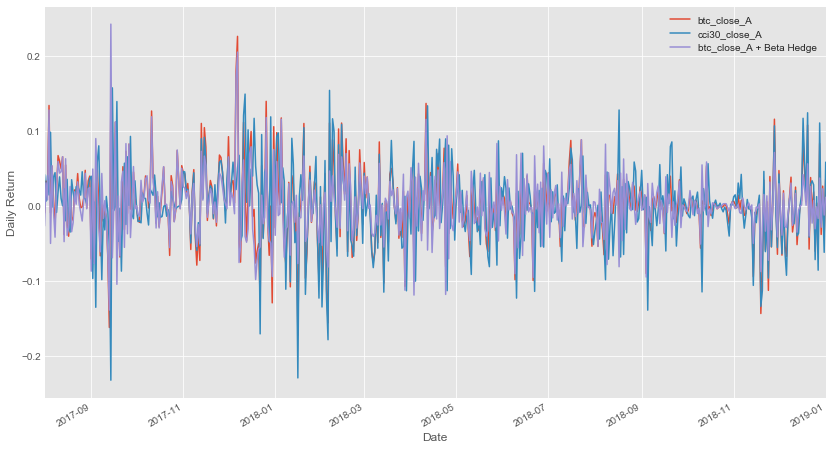

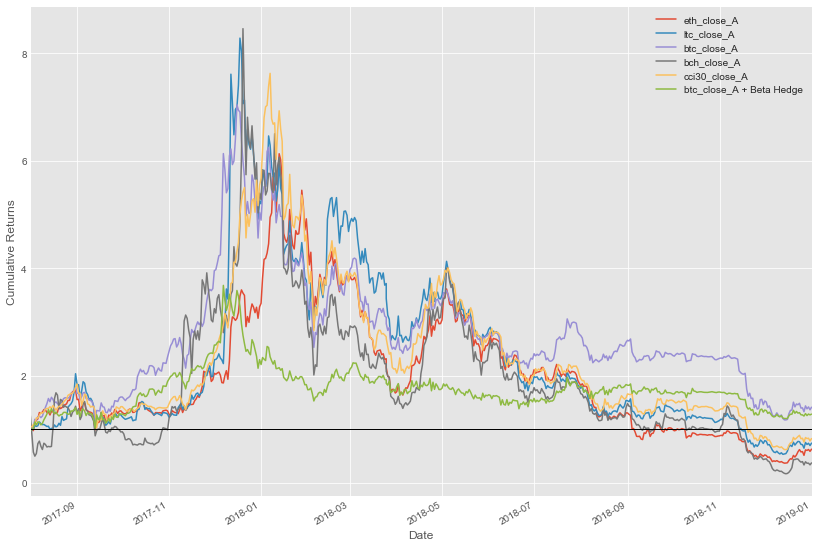

beta
Date
2017-08-01   -0.051767
2017-08-02    0.026208
2017-08-03   -0.033574
2017-08-04    0.141293
2017-08-05    0.004578
Name: eth_close_A + Beta Hedge, dtype: float64


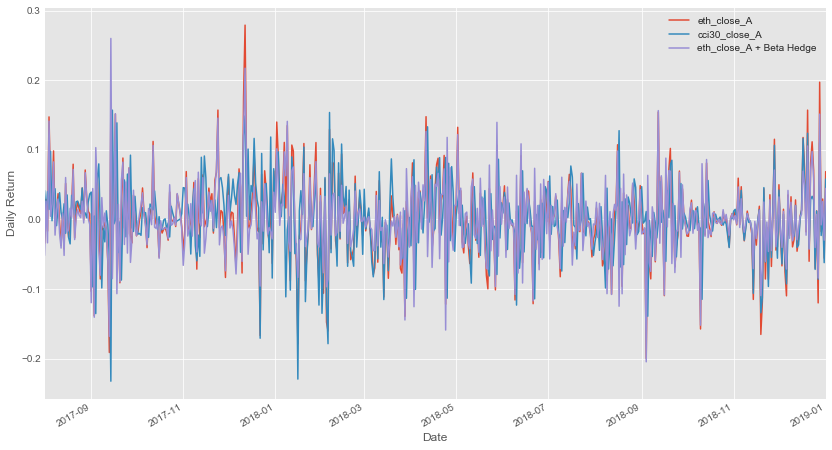

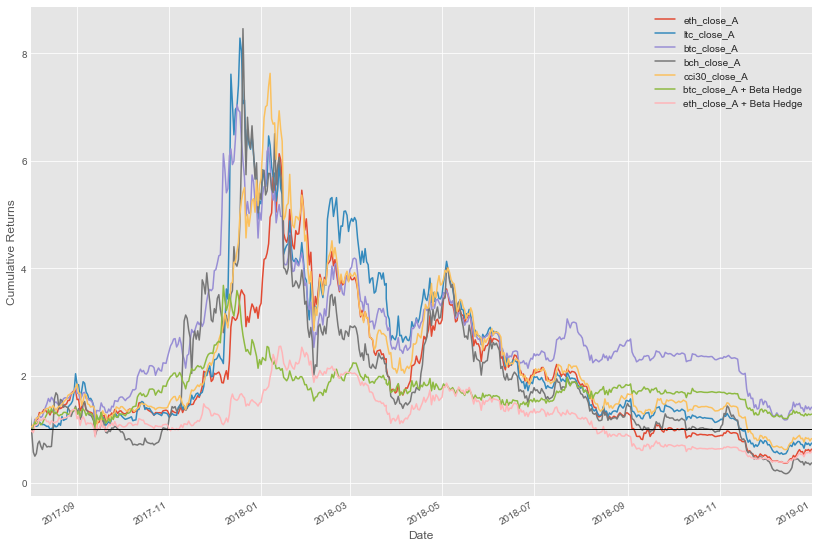

In [92]:
# create portflio with hedge beta 
# cleaning data 
plt.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.optimize as sco

results = smf.ols('btc_close_A ~ cci30_close_A', data=returns).fit()
results.params
beta = results.params[1]
##BTC beta hedge 
portfolio_x = -1*beta*returns['cci30_close_A'] + returns['btc_close_A']
portfolio_x.name = "btc_close_A + Beta Hedge"
print ('old beta'+str())
print(portfolio_x.head())

returns ['btc_close_A'].plot(figsize=(14,8))
returns['cci30_close_A'].plot(figsize=(14,8))
portfolio_x.plot(figsize=(14,8))
plt.ylabel("Daily Return")
plt.legend()


returns['btc_close_A + Beta Hedge'] = portfolio_x
cum_daily_return = (1 + returns).cumprod()
cum_daily_return.tail()
cum_daily_return.plot(grid = True, figsize=(14,10)).axhline(y = 1, color = "black", lw = 1)
plt.ylabel("Cumulative Returns")
plt.legend()


plt.show()



# eth beta hedge
portfolio_l = -1*beta*returns['cci30_close_A'] + returns['eth_close_A']
portfolio_l.name = "eth_close_A + Beta Hedge"
print ('beta'+str())
print(portfolio_l.head())

returns ['eth_close_A'].plot(figsize=(14,8))
returns['cci30_close_A'].plot(figsize=(14,8))
portfolio_l.plot(figsize=(14,8))
plt.ylabel("Daily Return")
plt.legend()

returns['btc_close_A + Beta Hedge'] = portfolio_x
returns['eth_close_A + Beta Hedge'] = portfolio_l
cum_daily_return = (1 + returns).cumprod()
cum_daily_return.tail()
cum_daily_return.plot(grid = True, figsize=(14,10)).axhline(y = 1, color = "black", lw = 1)
plt.ylabel("Cumulative Returns")
plt.legend()



plt.show()

In [93]:
#portfolio.head()

In [94]:
portfolio_x.head()

Date
2017-08-01   -0.026960
2017-08-02    0.030346
2017-08-03    0.007694
2017-08-04    0.127524
2017-08-05   -0.050172
Name: btc_close_A + Beta Hedge, dtype: float64

In [95]:
portfolio_l.head()

Date
2017-08-01   -0.051767
2017-08-02    0.026208
2017-08-03   -0.033574
2017-08-04    0.141293
2017-08-05    0.004578
Name: eth_close_A + Beta Hedge, dtype: float64

In [96]:
#portfolio_y.head()

In [97]:
return_E.tail()

Date
2018-12-28    0.197138
2018-12-29   -0.017391
2018-12-30    0.029352
2018-12-31   -0.055473
2019-01-01    0.068694
Name: Close, dtype: float64

In [98]:
# Data frame for returns
returns = pd.DataFrame()
returns["eth_Hedge_A"] = portfolio_l
returns["ltc_NA_A"] = return_D
returns["btc_Hedge_A"] = portfolio_x
returns["bch_NA_A"] = return_B
returns["cci30_close_A"] = return_A
returns = returns.dropna()
# cleaning data becuase there is differnce between number of days in stock market and BTC

print(returns.head())

            eth_Hedge_A  ltc_NA_A  btc_Hedge_A  bch_NA_A  cci30_close_A
Date                                                                   
2017-08-01    -0.051767 -0.028730    -0.026960  0.255697       0.041634
2017-08-02     0.026208  0.019800     0.030346 -0.264091       0.006097
2017-08-03    -0.033574  0.013099     0.007694 -0.376404       0.040087
2017-08-04     0.141293  0.067652     0.127524 -0.129696       0.014386
2017-08-05     0.004578 -0.014706    -0.050172  0.097912       0.097893


Text(0, 0.5, 'Daily Returns of the cryptocurrency+Hedge and cci30')

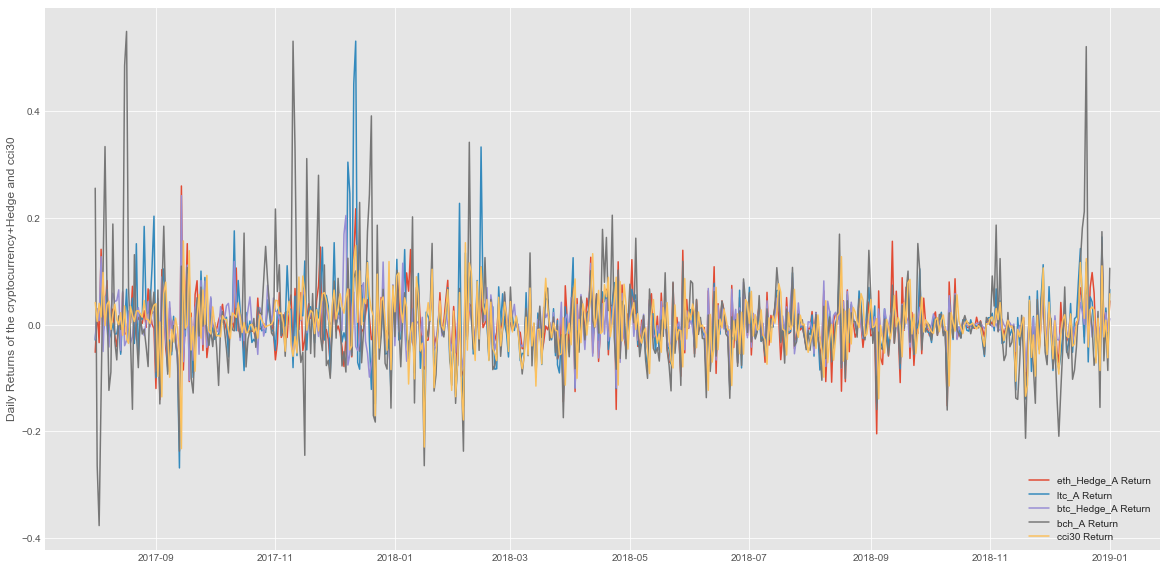

In [99]:
plt.style.use('ggplot')
# Plot return of stock returns and S&P 500 against each other
plt.figure(figsize=(20,10))
plt.plot(returns["eth_Hedge_A"], label="eth_Hedge_A" +' Return')
plt.plot(returns["ltc_NA_A"], label="ltc_A" +' Return')
plt.plot(returns["btc_Hedge_A"], label="btc_Hedge_A" +' Return')
plt.plot(returns["bch_NA_A"], label="bch_A" +' Return')
plt.plot(returns["cci30_close_A"], label="cci30 Return")

plt.legend()
plt.grid(True)
plt.ylabel("Daily Returns of the cryptocurrency+Hedge and cci30")

In [100]:
import statsmodels.api as sm

# Return values of cci30
X = returns.cci30_close_A.values
# Return values of stocks
Y = returns.btc_Hedge_A.values
Z = returns.eth_Hedge_A.values
C = returns.ltc_NA_A.values
A = returns.bch_NA_A.values

# Calculating Alpha and Beta of individual stocks using OLS regression

def linreg(x,y):

    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()

    x = x[:, 1]
    return results.params

Beta_BTC_Hedge = linreg(X,Y)[1]
Beta_ETH_Hedge = linreg(X,Z)[1]
Beta_ltc_NA = linreg(X,C)[1]
Beta_BCH_NA = linreg(X,A)[1]

Alpha_BTC_Hedge = linreg(X,Y)[0]
Alpha_ETH_Hedge = linreg(X,Z)[0]
Alpha_ltc_NA = linreg(X,C)[0]
Alpha_BCH_NA = linreg(X,A)[0]



In [101]:
# CAPM r(equity) = r(f) + B(equity)(r(m) - r(f))
return_market = return_A.mean() * 519  
print ("return_market :"+str(return_market))
risk_free= 0.0230  # source of TB <https://www.bloomberg.com/markets/rates-bonds/government-bonds/us>


#Function to calculate return on equity 
def retequ(Beta, risk_free):
    return_equity = risk_free + Beta*(return_market - risk_free)
    return return_equity


#Array of return of individual crypto
ret_of_crypto_H = [retequ(Beta_BTC_Hedge, Alpha_BTC_Hedge), retequ(Beta_ETH_Hedge, Alpha_ETH_Hedge), retequ(Beta_ltc_NA, Alpha_ltc_NA), retequ(Beta_BCH_NA, Alpha_BCH_NA) ]
print(ret_of_crypto_H)

return_market :0.599608789142334
[0.0013690128661651376, 0.020033371511921833, 0.31542855932927355, 0.3382271012371991]


In [102]:
#Portfolio calculations for just one combination of weights
#Randomized weight distribution
weights = np.random.random(4) # we choose 4 becuase its random 4 values we have four crypto
weights /= np.sum(weights)
print(weights)

[0.34922625 0.24767841 0.31281097 0.09028436]


In [103]:
labels = ['BTC+H','ETH+H','LTC','BCH']
values = [0.34922625 , 0.24767841, 0.31281097, 0.09028436]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [81]:
#Correlation between crypto
print(returns.corr())
returns = returns[returns.columns.drop('cci30_close_A')]

               eth_Hedge_A  ltc_NA_A   btc_Hedge_A  bch_NA_A  cci30_close_A
eth_Hedge_A       1.000000  0.684613  6.157842e-01  0.446276   3.267660e-02
ltc_NA_A          0.684613  1.000000  5.244922e-01  0.435132   3.988678e-01
btc_Hedge_A       0.615784  0.524492  1.000000e+00  0.291913   6.535521e-17
bch_NA_A          0.446276  0.435132  2.919130e-01  1.000000   3.048442e-01
cci30_close_A     0.032677  0.398868  6.535521e-17  0.304844   1.000000e+00


In [82]:
#Return of portfolio
print(np.sum(ret_of_crypto_H * weights))

0.15955620524336928


In [83]:
#Volatility of portfolio
print(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))

1.233001449518974


In [84]:
#Monte Carlo simulation to get info for 50000 different weights of the four selected crypto
prets = []
pvols = []
crypto_weights = []
sharpe_ratio = []
for p in range (50000):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    prets.append(np.sum(ret_of_crypto_H * weights))
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))
    sharpe = np.sum(ret_of_crypto_H * weights) / np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights)))
    sharpe_ratio.append(sharpe)
    crypto_weights.append(weights)

In [85]:
#Making a dictionary of Monte Carlo results
portfolio_x = {'Returns': prets,
             'Volatility': pvols,
             'Sharpe Ratio': sharpe_ratio}
selected= []
for counter,symbol in enumerate(selected):
    portfolio_x[symbol+' Weight'] = [Weight[counter] for Weight in crypto_weights]
    
#Make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio_x)

#Get better labels for desired arrangement of columns
column_order_x = ['Returns', 'Volatility', 'Sharpe Ratio'] + [crypto+' Weight' for crypto in selected]

#Reorder dataframe columns
df = df[column_order_x]
print(df.head())

    Returns  Volatility  Sharpe Ratio
0  0.215278    1.084213      0.198557
1  0.145595    1.029118      0.141475
2  0.165792    1.310764      0.126485
3  0.154713    1.177463      0.131395
4  0.130739    1.328121      0.098439


Text(0.5, 1.0, 'Efficient Frontier')

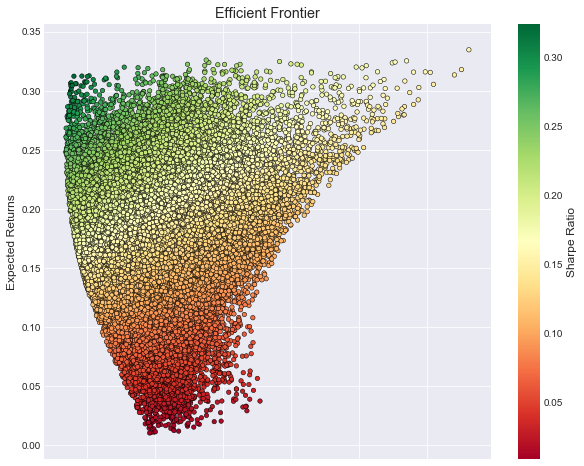

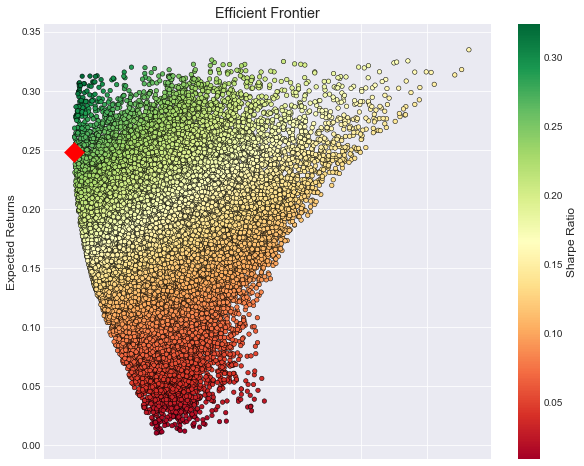

In [86]:
#Plot frontier with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

#Find min Volatility in hedge portflio 
min_volatility = df['Volatility'].min()


#Use the min to locate and create hedge portfolios

min_variance_Hedge_port = df.loc[df['Volatility'] == min_volatility]

min_variance_Hedge_port_info = df['Volatility'] == min_volatility


#Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=min_variance_Hedge_port['Volatility'], y=min_variance_Hedge_port['Returns'], c='red', marker='D', s=200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')



In [87]:
print(min_variance_Hedge_port.T)

                  9335
Returns       0.247958
Volatility    0.938379
Sharpe Ratio  0.264240


# 4.3.1 Well diversified Portfolio (four crypto currencies, SNX, VIX, and QBIT): (Most recommend portlio`s)

In [55]:
### Hedging assets trials:

# Bitcoin DataFrame

btc = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
btc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,4007.709961,3628.429932,3646.090088,3947.860107,353705007,3947.860107
2018-12-29,4004.139893,3774.379883,3947.860107,3797.060059,214891355,3797.060059
2018-12-30,3925.179932,3760.800049,3797.060059,3896.209961,191958416,3896.209961
2018-12-31,3904.280029,3701.479980,3896.209961,3747.389893,206190463,3747.389893
2019-01-01,3938.750000,3696.939941,3747.389893,3880.149902,170598307,3880.149902


In [56]:
gold = web.get_data_yahoo('GOLD', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
gold.tail()

gold_close= pd.DataFrame(gold.Close)
gold_close.head()

,Close
Date,
2017-08-01,17.240000
2017-08-02,17.139999
2017-08-03,17.059999
2017-08-04,16.610001
2017-08-07,16.570000


In [57]:
#correlation coffecient btc and gold 
gold['Close'].corr(btc['Close'])

-0.15584866708988546

In [58]:
TNX = web.get_data_yahoo('^TNX', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
TNX.tail()
TNX_close= pd.DataFrame(TNX.Close)
TNX_close.head()

,Close
Date,
2017-08-01,2.251
2017-08-02,2.262
2017-08-03,2.228
2017-08-04,2.267
2017-08-07,2.257


In [59]:
#correlation coffecient btc and TNX 
TNX['Close'].corr(btc['Close'])

-0.009964713526482077

In [62]:
VIX = web.get_data_yahoo('^VIX', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
VIX.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,36.099998,29.16,29.290001,36.070000,0,36.070000
2018-12-26,36.200001,29.59,35.500000,30.410000,0,30.410000
2018-12-27,33.799999,29.66,31.200001,29.959999,0,29.959999
2018-12-28,31.049999,27.43,29.969999,28.340000,0,28.340000
2018-12-31,27.639999,25.33,27.590000,25.420000,0,25.420000


In [63]:
VIX_close= pd.DataFrame(VIX.Close)
VIX_close.head()

,Close
Date,
2017-08-01,10.09
2017-08-02,10.28
2017-08-03,10.44
2017-08-04,10.03
2017-08-07,9.93


In [64]:
#correlation coffecient btc and gold 
VIX['Close'].corr(btc['Close'])

-0.204049366105162

In [66]:
GSPC = web.get_data_yahoo('^GSPC', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
GSPC.tail()

GSPC_close= pd.DataFrame(GSPC.Close)
GSPC_close.head()

,Close
Date,
2017-08-01,2476.350098
2017-08-02,2477.570068
2017-08-03,2472.159912
2017-08-04,2476.830078
2017-08-07,2480.909912


In [67]:
#correlation coffecient btc and gold 
GSPC['Close'].corr(btc['Close'])

0.30372865386433606

In [68]:
url = "https://coinmarketcap.com/currencies/qubitica/historical-data/?start=20170801&end=20181231"
qbit= pd.read_html(url)[0]
#qbit.sort_index(inplace=True)
qbit_close = qbit.rename(columns = {"Close**": "close"})
qbit_close['Date'] = qbit_close['Date'].astype('datetime64[ns]') 
qbit_close.head()

,Date,Open*,High,Low,close,Volume,Market Cap
0,2018-12-31,4.24,4.25,4.07,4.09,1886,11388754
1,2018-12-30,4.18,4.31,4.07,4.24,1153,11787273
2,2018-12-29,3.61,4.45,3.61,4.19,1460,11662524
3,2018-12-28,3.61,3.61,3.61,3.61,-,10040612
4,2018-12-27,4.04,4.06,3.61,3.61,-,10040612


In [69]:
QBIT=qbit_close.set_index("Date")


In [70]:
QBIT.head()

,Open*,High,Low,close,Volume,Market Cap
Date,,,,,,
2018-12-31,4.24,4.25,4.07,4.09,1886,11388754
2018-12-30,4.18,4.31,4.07,4.24,1153,11787273
2018-12-29,3.61,4.45,3.61,4.19,1460,11662524
2018-12-28,3.61,3.61,3.61,3.61,-,10040612
2018-12-27,4.04,4.06,3.61,3.61,-,10040612


In [71]:
url = "https://coinmarketcap.com/currencies/synthetix-network-token/historical-data/?start=20130428&end=20190902"
SNX= pd.read_html(url)[0]
#qbit.sort_index(inplace=True)
SNX_close = SNX.rename(columns = {"Close**": "close"})
SNX_close['Date'] = SNX_close['Date'].astype('datetime64[ns]') 
SNX_close.head()

,Date,Open*,High,Low,close,Volume,Market Cap
0,2019-09-02,0.397285,0.435758,0.375689,0.424457,83445,54095994
1,2019-09-01,0.354341,0.397213,0.344330,0.396782,66547,50568914
2,2019-08-31,0.378683,0.379752,0.345516,0.354400,13613,45167447
3,2019-08-30,0.381571,0.407813,0.355433,0.378629,96845,48255387
4,2019-08-29,0.357462,0.381697,0.351665,0.381571,57719,48623814


In [72]:
SNX=SNX_close.set_index("Date")


In [73]:
SNX.head()

,Open*,High,Low,close,Volume,Market Cap
Date,,,,,,
2019-09-02,0.397285,0.435758,0.375689,0.424457,83445,54095994
2019-09-01,0.354341,0.397213,0.344330,0.396782,66547,50568914
2019-08-31,0.378683,0.379752,0.345516,0.354400,13613,45167447
2019-08-30,0.381571,0.407813,0.355433,0.378629,96845,48255387
2019-08-29,0.357462,0.381697,0.351665,0.381571,57719,48623814


In [74]:
GTSOX = web.get_data_yahoo('GTSOX', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
GTSOX.tail()

GTSOX_close= pd.DataFrame(GTSOX.Close)
GTSOX_close.head()

,Close
Date,
2017-08-01,12.58
2017-08-02,12.58
2017-08-03,12.58
2017-08-04,12.59
2017-08-07,12.59


In [75]:
AMZN = web.get_data_yahoo('AMZN', start=datetime.datetime(2017, 8, 1), end=datetime.datetime(2018, 12, 31))
AMZN.tail()

AMZN_close= pd.DataFrame(AMZN.Close)
AMZN_close.head()

,Close
Date,
2017-08-01,996.190002
2017-08-02,995.890015
2017-08-03,986.919983
2017-08-04,987.580017
2017-08-07,992.270020


In [79]:
#correlation coffecient btc and GTSOX 
GTSOX['Close'].corr(btc['Close'])

0.7402439631530738

In [77]:
#correlation coffecient btc and gold 
gold['Close'].corr(GTSOX['Close'])


-0.07302282927347788

In [53]:
# the  Percentage of change :
return_A = cci30_close['Close'].pct_change()[1:].dropna()
return_A.head()


Date
2017-08-01    0.041634
2017-08-02    0.006097
2017-08-03    0.040087
2017-08-04    0.014386
2017-08-05    0.097893
Name: Close, dtype: float64

In [54]:
return_F = gold_close['Close'].pct_change()[1:].dropna()
return_F.head()

Date
2017-08-02   -0.005800
2017-08-03   -0.004667
2017-08-04   -0.026377
2017-08-07   -0.002408
2017-08-08   -0.004224
Name: Close, dtype: float64

In [55]:
return_B = bch_close['Close'].pct_change()[1:].dropna()


In [56]:
return_c = btc_close['Close'].pct_change()[1:].dropna()


In [57]:
return_D = ltc_close['Close'].pct_change()[1:].dropna()


In [58]:
return_E = eth_close['Close'].pct_change()[1:].dropna()


In [59]:
return_G = QBIT['close'].pct_change()[1:].dropna()


In [60]:
return_H = VIX_close['Close'].pct_change()[1:].dropna()


In [61]:
return_L = SNX['close'].pct_change()[1:].dropna()


In [62]:
return_A.size

519

            eth_close_A  ltc_close_A  btc_close_A  bch_close_A  SNX_close_A  \
Date                                                                          
2018-08-28    -0.023279    -0.025649    -0.005553    -0.019035     0.064388   
2018-08-29    -0.015658    -0.021287    -0.007550    -0.028475     0.029465   
2018-08-30    -0.008763     0.031546     0.004029     0.006478     0.002148   
2018-08-31     0.048640     0.069854     0.025118     0.139371    -0.031250   
2018-09-04    -0.199699    -0.147015    -0.090209    -0.158910     0.207089   

            QBIT_close_A  VIX_close_A  cci30_close_A  
Date                                                  
2018-08-28      0.025735     0.027961       0.046200  
2018-08-29      0.018727    -0.020000      -0.021655  
2018-08-30     -0.007435     0.104490      -0.017380  
2018-08-31     -0.028881    -0.049520       0.014032  
2018-09-04      0.201754     0.023328       0.011389  
Beta_BTC=0.5935288784632415
Beta_ETH=0.7937995755885074
Beta_

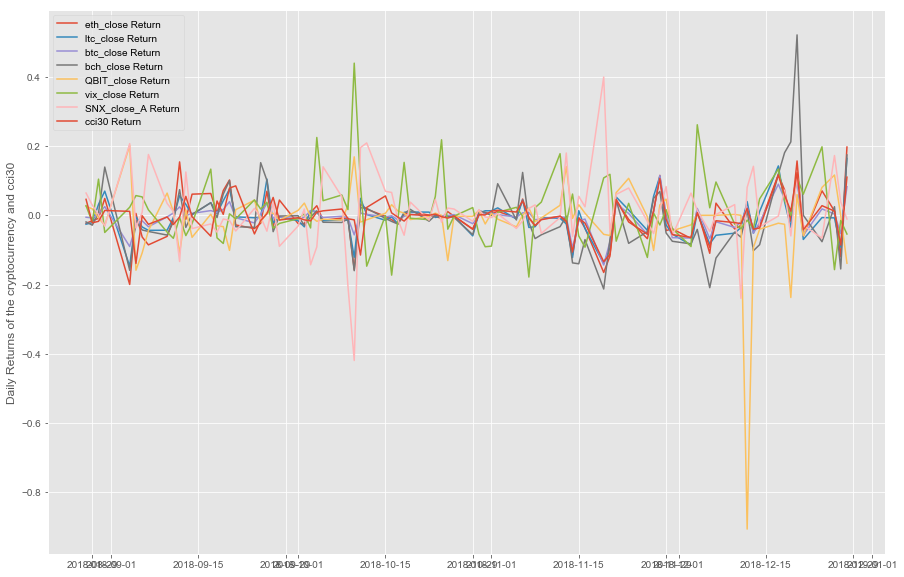

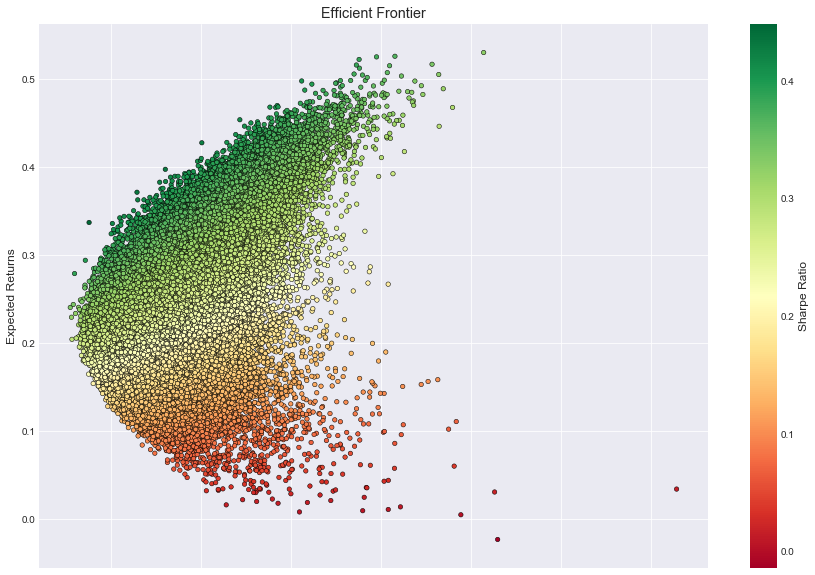

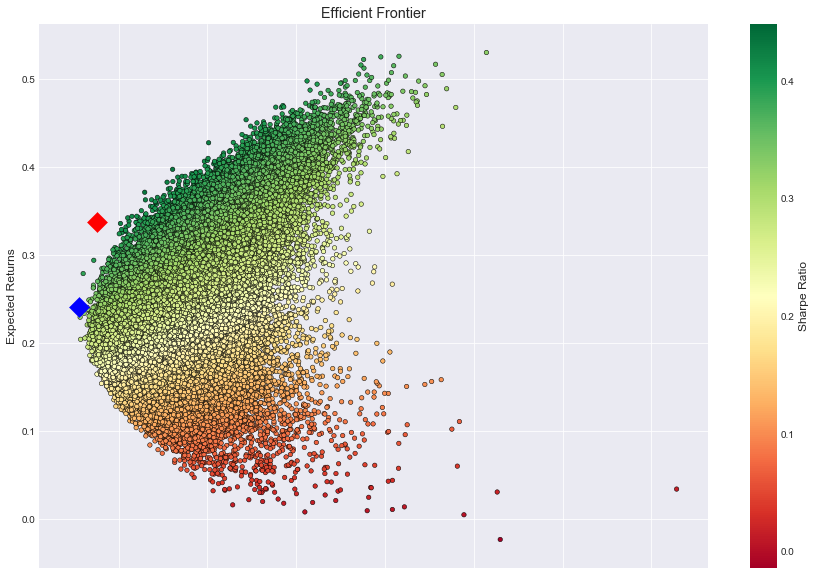

In [63]:


# Data frame for returns
returns = pd.DataFrame()
returns["eth_close_A"] = return_E 
returns["ltc_close_A"] = return_D
returns["btc_close_A"] = return_c
returns["bch_close_A"] = return_B
returns["SNX_close_A"] = return_L
returns["QBIT_close_A"] = return_G
returns["VIX_close_A"] = return_H
returns["cci30_close_A"] = return_A
returns = returns.dropna()
# cleaning data becuase there is differnce between number of days in stock vix market and BTC

print(returns.head())

plt.style.use('ggplot')
# Plot return of stock returns and CCI30 against each other
plt.figure(figsize=(15,10))
plt.plot(returns["eth_close_A"], label="eth_close" +' Return')
plt.plot(returns["ltc_close_A"], label="ltc_close" +' Return')
plt.plot(returns["btc_close_A"], label="btc_close" +' Return')
plt.plot(returns["bch_close_A"], label="bch_close" +' Return')
plt.plot(returns["QBIT_close_A"], label="QBIT_close" +' Return')
plt.plot(returns["VIX_close_A"], label="vix_close" +' Return')
plt.plot(returns["SNX_close_A"], label="SNX_close_A" +' Return')
plt.plot(returns["cci30_close_A"], label="cci30 Return")

plt.legend()
plt.grid(True)
plt.ylabel("Daily Returns of the cryptocurrency and cci30")

import statsmodels.api as sm

# Return values of S&P 500
X = returns.cci30_close_A.values
# Return values of stocks
Y = returns.btc_close_A.values
Z = returns.eth_close_A.values
N = returns.ltc_close_A.values
A = returns.bch_close_A.values
F = returns.QBIT_close_A.values
G = returns.VIX_close_A.values
L = returns.SNX_close_A.values
# Calculating Alpha and Beta of individual stocks using OLS regression

def linreg(x,y):

    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()

    x = x[:, 1]
    return results.params

Beta_BTC = linreg(X,Y)[1]
Beta_ETH = linreg(X,Z)[1]
Beta_LTC = linreg(X,N)[1]
Beta_BCH = linreg(X,A)[1]
Beta_QBIT = linreg(X,F)[1]
Beta_VIX = linreg(X,G)[1]
Beta_SNX= linreg(X,L)[1]

Alpha_BTC = linreg(X,Y)[0]
Alpha_ETH = linreg(X,Z)[0]
Alpha_LTC = linreg(X,N)[0]
Alpha_BCH = linreg(X,A)[0]
Alpha_QBIT = linreg(X,F)[0]
Alpha_VIX = linreg(X,G)[0]
Alpha_SNX = linreg(X,L)[0]

print("Beta_BTC="+str(Beta_BTC))
print("Beta_ETH="+str(Beta_ETH))
print("Beta_LTC="+str(Beta_LTC))
print("Beta_BCH="+str(Beta_BCH))
print("Beta_QBIT="+str(Beta_QBIT))
print("Beta_VIX="+str(Beta_VIX))
print("Beta_SNX="+str(Beta_SNX))

print("Alpha_BTC:"+str(Alpha_BTC))
print("Alpha_ETH:"+str(Alpha_ETH))
print("Alpha_LTC:"+str(Alpha_LTC))
print("Alpha_BCH:"+str(Alpha_BCH))
print("Alpha_QBIT:"+str(Alpha_QBIT))
print("Alpha_VIX:"+str(Alpha_VIX))
print("Alpha_SNX:"+str(Alpha_SNX))

# CAPM r(equity) = r(f) + B(equity)(r(m) - r(f))
return_market = return_A.mean() * 519  # <https://ycharts.com/indicators/sandp_500_total_return_annual?fbclid=IwAR3uqq9W0KOKPDNenAW90CBa-0q4fh0qksjD7E7fVu0jM2Pohdb-0fS_2wI>
print ("return_market :"+str(return_market))
risk_free= 0.0258  # source of TB <https://www.bloomberg.com/markets/rates-bonds/government-bonds/us>

#Function to calculate return on equity 
def retequ(Beta, risk_free):
    return_equity = risk_free + Beta*(return_market - risk_free)
    return return_equity


#Array of return of individual crypto
ret_of_crypto_H = [retequ(Beta_BTC, Alpha_BTC), retequ(Beta_ETH, Alpha_ETH), retequ(Beta_LTC, Alpha_LTC), retequ(Beta_BCH, Alpha_BCH),retequ(Beta_VIX, Alpha_VIX),retequ(Beta_SNX, Alpha_SNX),retequ(Beta_QBIT, Alpha_QBIT)]
print(ret_of_crypto_H)#retequ(Beta_AMZN, Alpha_AMZN) , retequ(Beta_QBIT, Alpha_QBIT)


#Portfolio calculations for just one combination of weights
#Randomized weight distribution
weights = np.random.random(7) # we choose 8 becuase its random 4 values we have four crypto
weights /= np.sum(weights)
print(weights)



#Correlation between crypto
print(returns.corr())
returns = returns[returns.columns.drop('cci30_close_A')]

#Return of portfolio
print(np.sum(ret_of_crypto_H * weights))

#Volatility of portfolio
print(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))

#Monte Carlo simulation to get info for 500 different weights of the four selected crypto
prets = []
pvols = []
crypto_weights = []
sharpe_ratio = []
for p in range (100000):
    weights = np.random.random(7)
    weights /= np.sum(weights)
    prets.append(np.sum(ret_of_crypto_H * weights))
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights))))
    sharpe = np.sum(ret_of_crypto_H * weights) / np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 519, weights)))
    sharpe_ratio.append(sharpe)
    crypto_weights.append(weights)
    
    

    #Making a dictionary of Monte Carlo results
portfolio = {'Returns': prets,
             'Volatility': pvols,
             'Sharpe Ratio': sharpe_ratio}
selected= []
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in crypto_weights]
    
#Make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

#Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [crypto+' Weight' for crypto in selected]

#Reorder dataframe columns
df = df[column_order]
print(df.head())


#Plot frontier with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(15, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')




#Find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

#Use the min, max values to locate and create the two special portfolios
sharpe_port_Diversified = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port_Divirsified = df.loc[df['Volatility'] == min_volatility]

min_variance_port_Divirsified_info = df['Volatility'] == min_volatility
sharpe_port_Diversified_info = df['Sharpe Ratio'] == max_sharpe

#Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(15, 10), grid=True)
plt.scatter(x=sharpe_port_Diversified['Volatility'], y=sharpe_port_Diversified['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port_Divirsified['Volatility'], y=min_variance_port_Divirsified['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

#Print the details of the 2 special portfolios
print(min_variance_port_Divirsified.T)
print(sharpe_port_Diversified.T)




In [104]:
labels = ['BTC','ETH','LTC','BCH','QBIT','VIX','SNX']

values = [0.28148053 , 0.25717069, 0.08005043, 0.07635744,0.10026002,0.04408134,0.16059954]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

# Data Mining_Decision_Tree

In [64]:
### decision tree questions: kindly answer the following question to assign you to the most suitable portflio
# 1)How old are you?
#  A) 18-35 B)36-60 C)>60 
# 2)what is the level of risk you welling to take?  
# Ans:  A)very high  B)High C) Reasonable risk D) Low risk 



df = pd.read_excel ("training.xlsx")
print(df)


    customer_ID Age_interval risk_tolerance_Acc                       portflio
0             1        young   very _high _risk              min_variance_port
1             2        young          high_risk              min_variance_port
2             3        young      resnable_risk        sharpe_port_Diversified
3             4        young      resnable_risk        sharpe_port_Diversified
4             5        young           low_risk  min_variance_Divirsified_port
5             6        young           low_risk  min_variance_Divirsified_port
6             7        young   very _high _risk              min_variance_port
7             8        young          high_risk              min_variance_port
8             9        young      resnable_risk        sharpe_port_Diversified
9            10        young      resnable_risk        sharpe_port_Diversified
10           11        young           low_risk  min_variance_Divirsified_port
11           12        young           low_risk  min

In [77]:
df.portflio

0                 min_variance_port
1                 min_variance_port
2           sharpe_port_Diversified
3           sharpe_port_Diversified
4     min_variance_Divirsified_port
5     min_variance_Divirsified_port
6                 min_variance_port
7                 min_variance_port
8           sharpe_port_Diversified
9           sharpe_port_Diversified
10    min_variance_Divirsified_port
11    min_variance_Divirsified_port
12                min_variance_port
13                min_variance_port
14          min_variance_Hedge_port
15          min_variance_Hedge_port
16          sharpe_port_Diversified
17          sharpe_port_Diversified
18    min_variance_Divirsified_port
19    min_variance_Divirsified_port
20                min_variance_port
21                min_variance_port
22          min_variance_Hedge_port
23          min_variance_Hedge_port
24          sharpe_port_Diversified
25          sharpe_port_Diversified
26    min_variance_Divirsified_port
27    min_variance_Divirsifi

In [78]:
def convert_Age_interval_numric (txt):
    if 'young' in txt:
        return 1
    if 'adult'in txt:
        return 2
    else:
        return 3 

In [79]:
df.Age_interval= df.Age_interval.apply(convert_Age_interval_numric)
print(df)

    customer_ID  Age_interval risk_tolerance_Acc  \
0             1             1   very _high _risk   
1             2             1          high_risk   
2             3             1      resnable_risk   
3             4             1      resnable_risk   
4             5             1           low_risk   
5             6             1           low_risk   
6             7             1   very _high _risk   
7             8             1          high_risk   
8             9             1      resnable_risk   
9            10             1      resnable_risk   
10           11             1           low_risk   
11           12             1           low_risk   
12           13             2   very _high _risk   
13           14             2   very _high _risk   
14           15             2          high_risk   
15           16             2          high_risk   
16           17             2      resnable_risk   
17           18             2      resnable_risk   
18          

In [80]:
def convert_risk_tolerance_Acc (txt):
    if 'very _high _risk' in txt:
        return 1
    if 'high_risk'in txt:
        return 2
    if 'resnable_risk'in txt:
        return 3
    else:
        return 4 

df.risk_tolerance_Acc= df.risk_tolerance_Acc.apply(convert_risk_tolerance_Acc)
print(df)

    customer_ID  Age_interval  risk_tolerance_Acc  \
0             1             1                   1   
1             2             1                   2   
2             3             1                   3   
3             4             1                   3   
4             5             1                   4   
5             6             1                   4   
6             7             1                   1   
7             8             1                   2   
8             9             1                   3   
9            10             1                   3   
10           11             1                   4   
11           12             1                   4   
12           13             2                   1   
13           14             2                   1   
14           15             2                   2   
15           16             2                   2   
16           17             2                   3   
17           18             2                 

In [81]:
def convert_port_categorical_numric (txt):
    if 'min_variance_port' in txt:
        return 1
    if 'min_variance_Hedge_port'in txt:
        return 2
    if 'min_variance_Divirsified_port'in txt:
        return 3
    else:
        return 4
    


In [82]:
df.portflio= df.portflio.apply(convert_port_categorical_numric)

df

,customer_ID,Age_interval,risk_tolerance_Acc,portflio
0,1,1,1,1
1,2,1,2,1
2,3,1,3,4
3,4,1,3,4
4,5,1,4,3
5,6,1,4,3
6,7,1,1,1
7,8,1,2,1
8,9,1,3,4
9,10,1,3,4


In [83]:
df.drop(df.columns[0], axis=1, inplace=True)

In [84]:
df

,Age_interval,risk_tolerance_Acc,portflio
0,1,1,1
1,1,2,1
2,1,3,4
3,1,3,4
4,1,4,3
5,1,4,3
6,1,1,1
7,1,2,1
8,1,3,4
9,1,3,4


In [85]:
headers = ["Age_interval","risk_tolerance_Acc"]
X = df[headers] # Features
y = df.portflio # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [86]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [87]:
df_1 = pd.read_excel ("training.xlsx")
print(df_1)



    customer_ID Age_interval risk_tolerance_Acc                       portflio
0             1        young   very _high _risk              min_variance_port
1             2        young          high_risk              min_variance_port
2             3        young      resnable_risk        sharpe_port_Diversified
3             4        young      resnable_risk        sharpe_port_Diversified
4             5        young           low_risk  min_variance_Divirsified_port
5             6        young           low_risk  min_variance_Divirsified_port
6             7        young   very _high _risk              min_variance_port
7             8        young          high_risk              min_variance_port
8             9        young      resnable_risk        sharpe_port_Diversified
9            10        young      resnable_risk        sharpe_port_Diversified
10           11        young           low_risk  min_variance_Divirsified_port
11           12        young           low_risk  min

In [ ]:
df_1.drop(df_1.columns[0], axis=1, inplace=True)

df_1.head()

In [89]:
def convert_port_categorical_numric (txt):
    if 'min_variance_port' in txt:
        return 1
    if 'min_variance_Hedge_port'in txt:
        return 2
    if 'min_variance_Divirsified_port'in txt:
        return 3
    else:
        return 4

In [90]:
df_1.portflio= df_1.portflio.apply(convert_port_categorical_numric)

df_1

,Age_interval,risk_tolerance_Acc,portflio
0,young,very _high _risk,1
1,young,high_risk,1
2,young,resnable_risk,4
3,young,resnable_risk,4
4,young,low_risk,3
5,young,low_risk,3
6,young,very _high _risk,1
7,young,high_risk,1
8,young,resnable_risk,4
9,young,resnable_risk,4


In [91]:
df_1 = pd.get_dummies(df_1)
df_1

,portflio,Age_interval_adult,Age_interval_old,Age_interval_young,risk_tolerance_Acc_high_risk,risk_tolerance_Acc_low_risk,risk_tolerance_Acc_resnable_risk,risk_tolerance_Acc_very _high _risk
0,1,0,0,1,0,0,0,1
1,1,0,0,1,1,0,0,0
2,4,0,0,1,0,0,1,0
3,4,0,0,1,0,0,1,0
4,3,0,0,1,0,1,0,0
5,3,0,0,1,0,1,0,0
6,1,0,0,1,0,0,0,1
7,1,0,0,1,1,0,0,0
8,4,0,0,1,0,0,1,0
9,4,0,0,1,0,0,1,0


In [92]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [93]:
X_train = df_1.loc[:, df_1.columns != 'portflio']
Y_train = df_1.portflio

In [94]:
clf = tree.DecisionTreeClassifier(criterion='entropy')



In [95]:
clf = clf.fit(X_train,Y_train)


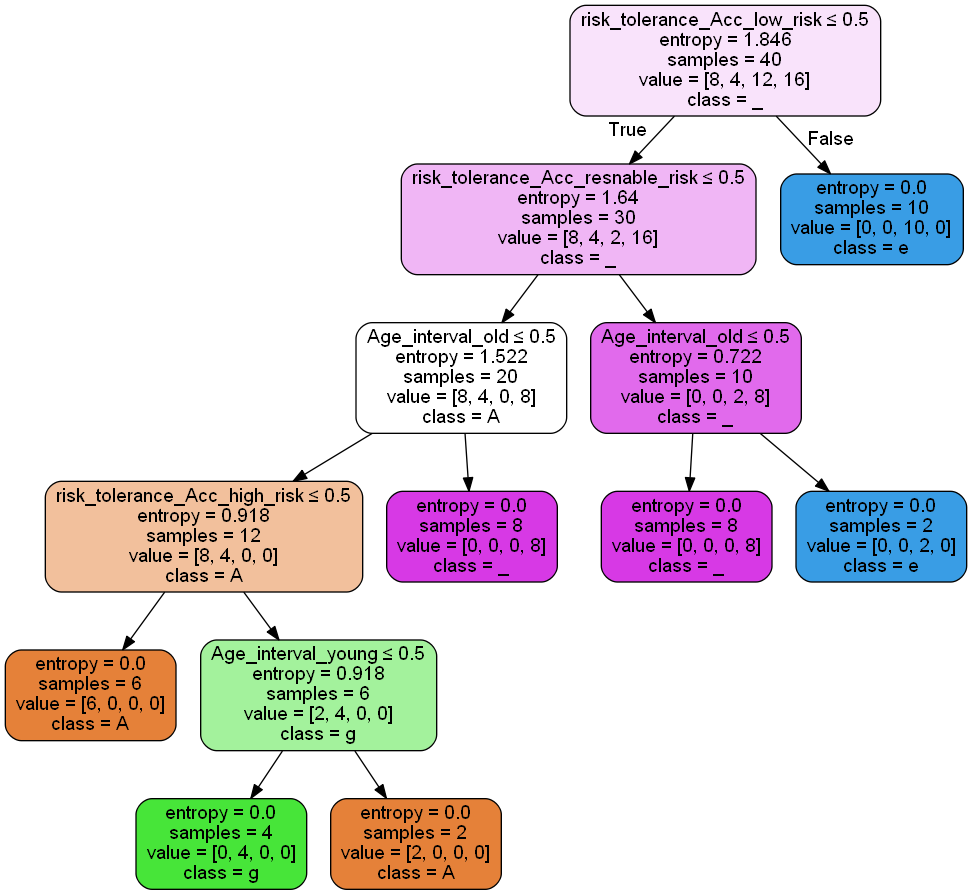

In [96]:
plot_decision_tree(clf, X_train.columns,df_1.columns[1])

